## Experimentation

### Libraries import

In [19]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1.0 Data Ingestion

In [2]:
FILE_NAME = "energydata_complete.csv"
DATA_FOLDER = "data"

In [3]:
main_path = os.getcwd()
main_path

'C:\\Users\\all4u\\purplezone\\appliances_energy_prediction'

In [4]:
file_path = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_NAME)
file_path

'C:\\Users\\all4u\\purplezone\\appliances_energy_prediction\\data\\energydata_complete.csv'

In [5]:
%%time

appliance_energy_data = pd.read_csv(file_path)

CPU times: total: 156 ms
Wall time: 218 ms


## 1.1 Data Inspection

In [6]:
appliance_energy_data.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.20,48.90,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.20,48.86,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61


In [37]:
appliance_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [10]:
appliance_energy_data["date"] = pd.to_datetime(appliance_energy_data["date"])

In [11]:
appliance_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

## 2.0 Exploratory Data Analysis

In [15]:
appliance_energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.00,97.69,102.52,10.00,50.00,60.00,100.00,1080.00
lights,19735.00,3.80,7.94,0.00,0.00,0.00,0.00,70.00
T1,19735.00,21.69,1.61,16.79,20.76,21.60,22.60,26.26
RH_1,19735.00,40.26,3.98,27.02,37.33,39.66,43.07,63.36
T2,19735.00,20.34,2.19,16.10,18.79,20.00,21.50,29.86
RH_2,19735.00,40.42,4.07,20.46,37.90,40.50,43.26,56.03
T3,19735.00,22.27,2.01,17.20,20.79,22.10,23.29,29.24
RH_3,19735.00,39.24,3.25,28.77,36.90,38.53,41.76,50.16
T4,19735.00,20.86,2.04,15.10,19.53,20.67,22.10,26.20
RH_4,19735.00,39.03,4.34,27.66,35.53,38.40,42.16,51.09


#### Appliances Energy plot

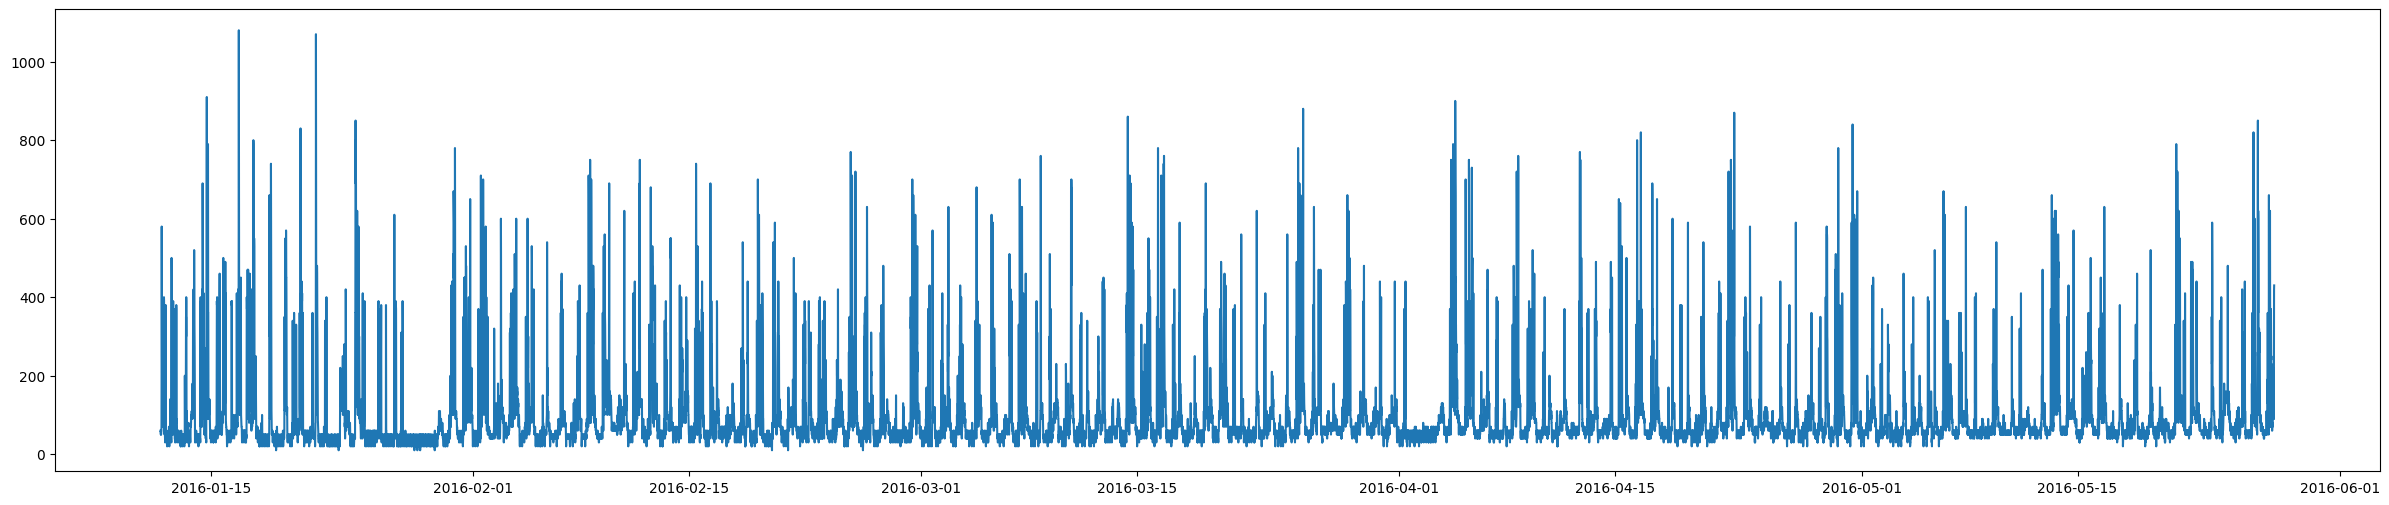

In [26]:
fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(appliance_energy_data["date"], appliance_energy_data["Appliances"])
plt.savefig("images/appliance energy plot.png")

#### Light Energy Plot

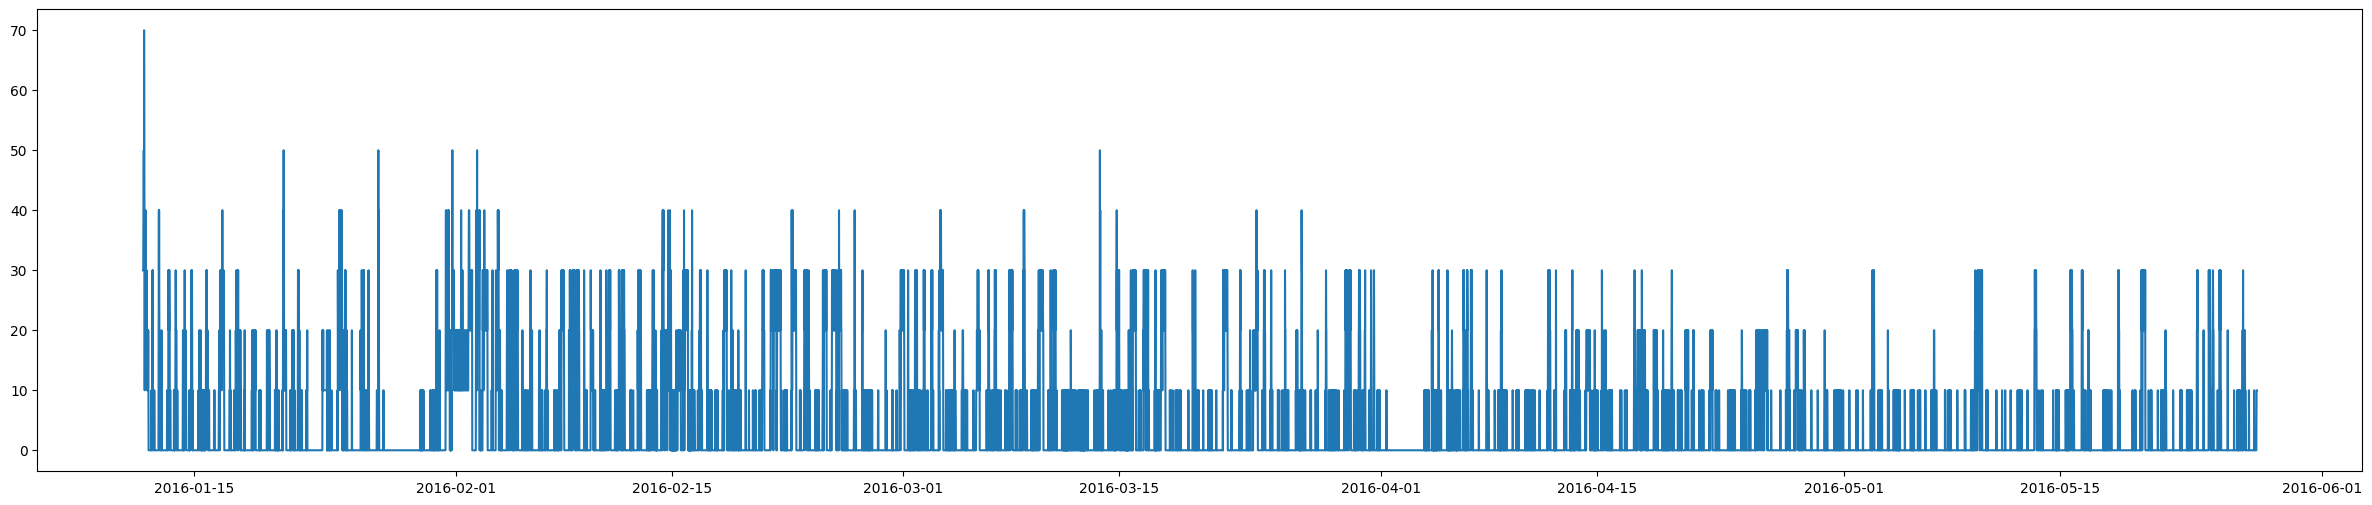

In [27]:
fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(appliance_energy_data["date"], appliance_energy_data["lights"])
plt.savefig("images/lights energy plot.png")

In [28]:
appliance_energy_data["lights"].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

## 3.0 Model Building

In [30]:
appliance_energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

##### -  Features Selection is very important in model building.

##### - Features Creations or Processing.


In [31]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [32]:
appliance_energy_data.shape

(19735, 29)

In [33]:
train_data, test_data = train_test_split(appliance_energy_data, test_size=0.33, random_state=42)

In [34]:
train_data.shape, test_data.shape

((13222, 29), (6513, 29))

In [35]:
train_data.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
11553,2016-03-31 22:30:00,50,0,22.70,38.90,20.57,41.20,22.00,38.53,20.50,40.40,19.89,48.63,6.19,66.36,20.26,34.09,24.60,42.95,20.00,40.43,6.20,755.80,87.00,3.50,32.50,4.15,25.74,25.74
6580,2016-02-26 09:40:00,350,0,20.03,38.83,18.43,39.59,20.60,37.29,19.82,35.73,18.33,45.40,3.36,84.50,18.70,33.79,20.10,41.06,18.00,41.29,2.33,755.00,90.00,1.00,59.67,0.83,17.72,17.72
4130,2016-02-09 09:20:00,190,0,21.39,43.76,20.63,42.43,22.46,41.79,20.10,43.53,20.00,46.88,6.19,87.70,18.87,37.98,21.31,51.28,19.00,46.16,5.83,737.47,93.00,4.67,61.67,4.77,29.92,29.92


In [36]:
test_data.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
8980,2016-03-14 01:40:00,40,0,20.89,35.40,17.76,39.16,20.29,36.90,19.76,34.20,18.60,51.29,1.20,63.82,21.60,33.66,23.07,39.75,19.29,39.03,1.77,768.90,88.33,2.33,63.00,0.00,25.62,25.62
2754,2016-01-30 20:00:00,90,10,21.89,53.10,21.29,45.36,21.63,49.23,20.53,40.97,17.68,58.20,2.53,97.09,16.89,39.34,20.62,47.56,16.29,44.20,2.70,754.60,90.00,3.00,27.00,1.20,23.47,23.47
9132,2016-03-15 03:00:00,50,0,21.39,35.50,17.63,40.53,21.67,35.20,20.29,33.76,19.60,40.29,-0.27,50.93,20.79,27.29,22.10,39.63,19.39,38.29,0.20,766.20,83.00,2.00,65.00,-2.40,0.14,0.14


In [38]:
%%time

save_path = 'artefacts/models_regression'
time_limit = 60
TARGET = "Appliances"

predictor = TabularPredictor(label=TARGET, path=save_path, problem_type="regression").fit(train_data, time_limit=time_limit)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "artefacts/models_regression\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    13222
Train Data Columns: 28
Label Column: Appliances
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1407.39 MB
	Train Data (Original)  Memory Usage: 2.96 MB (0.2% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in origina

[1000]	valid_set's rmse: 70.7033
[2000]	valid_set's rmse: 68.6426
[3000]	valid_set's rmse: 67.9091
[4000]	valid_set's rmse: 67.4642
[5000]	valid_set's rmse: 67.2891
[6000]	valid_set's rmse: 67.1218
[7000]	valid_set's rmse: 67.1112
[8000]	valid_set's rmse: 67.0224
[9000]	valid_set's rmse: 67.1021
[10000]	valid_set's rmse: 67.0847


	-67.0176	 = Validation score   (-root_mean_squared_error)
	30.55s	 = Training   runtime
	0.6s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 24.78s of the 24.78s of remaining time.


[1000]	valid_set's rmse: 66.7118
[2000]	valid_set's rmse: 65.5167
[3000]	valid_set's rmse: 65.0911
[4000]	valid_set's rmse: 65.0319


	-65.0148	 = Validation score   (-root_mean_squared_error)
	12.87s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 11.22s of the 11.22s of remaining time.
	-67.5555	 = Validation score   (-root_mean_squared_error)
	45.53s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 59.73s of the -35.11s of remaining time.
	-62.3174	 = Validation score   (-root_mean_squared_error)
	0.2s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 95.39s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("artefacts/models_regression\")


CPU times: total: 7min 41s
Wall time: 1min 35s


In [39]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-66.52,-62.32,4.74,0.96,89.21,0.05,0.00,0.20,2,True,6
1,KNeighborsDist,-66.94,-63.40,0.27,0.08,0.06,0.27,0.08,0.06,1,True,2
2,LightGBM,-69.96,-65.01,0.91,0.17,12.87,0.91,0.17,12.87,1,True,4
3,LightGBMXT,-71.29,-67.02,3.09,0.60,30.55,3.09,0.60,30.55,1,True,3
4,RandomForestMSE,-73.67,-67.56,0.42,0.11,45.53,0.42,0.11,45.53,1,True,5
5,KNeighborsUnif,-74.94,-70.12,0.27,0.27,2.21,0.27,0.27,2.21,1,True,1
